In [34]:
import pandas as pd
import xml.etree.ElementTree as xet

In [35]:
from glob import glob

In [36]:
path = glob('./pelatihan/*.xml')
path

['./pelatihan\\K1_A3772FV.xml',
 './pelatihan\\K1_A4638EG.xml',
 './pelatihan\\K1_AA2677GV.xml',
 './pelatihan\\K1_AA2930VV.xml',
 './pelatihan\\K1_AA2956JY.xml',
 './pelatihan\\K1_AA3189LY.xml',
 './pelatihan\\K1_AA3507TK.xml',
 './pelatihan\\K1_AA3524TG.xml',
 './pelatihan\\K1_AA3926M.xml',
 './pelatihan\\K1_AA4273SC.xml',
 './pelatihan\\K1_AA4407FC.xml',
 './pelatihan\\K1_AA4758DV.xml',
 './pelatihan\\K1_AA4957SV.xml',
 './pelatihan\\K1_AA5092MN.xml',
 './pelatihan\\K1_AA5097LY.xml',
 './pelatihan\\K1_AA5113PN.xml',
 './pelatihan\\K1_AA5276IM.xml',
 './pelatihan\\K1_AA5367EZ.xml',
 './pelatihan\\K1_AA6399RP.xml',
 './pelatihan\\K1_AA6626EC.xml',
 './pelatihan\\K1_AA6866DE.xml',
 './pelatihan\\K1_AB2077ER.xml',
 './pelatihan\\K1_AB2115QY.xml',
 './pelatihan\\K1_AB2238CH.xml',
 './pelatihan\\K1_AB2242OH.xml',
 './pelatihan\\K1_AB2312UV.xml',
 './pelatihan\\K1_AB2333RZ.xml',
 './pelatihan\\K1_AB2438RP.xml',
 './pelatihan\\K1_AB2548TA.xml',
 './pelatihan\\K1_AB2550XA.xml',
 './pelatihan

In [37]:
labels_dict = dict(filepath=[], xmin=[], xmax=[], ymin=[], ymax=[])
for filename in path:
    
    #filename = path[0]
    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    #print(xmin,xmax,ymin,ymax)
    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)
    

In [38]:
df= pd.DataFrame(labels_dict)
df

,filepath,xmin,xmax,ymin,ymax
0,./pelatihan\K1_A3772FV.xml,752,1961,1824,2424
1,./pelatihan\K1_A4638EG.xml,813,1887,1615,2067
2,./pelatihan\K1_AA2677GV.xml,774,1813,2459,2863
3,./pelatihan\K1_AA2930VV.xml,709,2031,2389,2867
4,./pelatihan\K1_AA2956JY.xml,874,1809,2189,2650
...,...,...,...,...,...
564,./pelatihan\K4_H1753FO.xml,948,1813,2419,2750
565,./pelatihan\K4_H1814ZY.xml,918,1970,2754,3175
566,./pelatihan\K4_N1489AT.xml,1044,1918,2137,2428
567,./pelatihan\K4_R1602IM.xml,966,1805,2324,2589


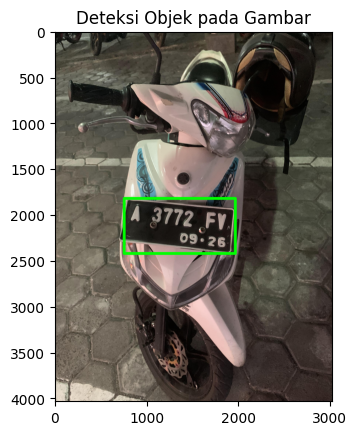

752 1961 1824 2424


In [45]:
import cv2
import matplotlib.pyplot as plt

# Pilih baris tertentu dari DataFrame
row_index = 0  # Ganti dengan indeks baris yang ingin Anda tampilkan
row = df.loc[row_index]

# Ambil nilai koordinat dari baris DataFrame
xmin = row['xmin']
xmax = row['xmax']
ymin = row['ymin']
ymax = row['ymax']

# Ambil path gambar terkait dari DataFrame
image_path = row['filepath'].replace('.xml', '.jpg')

# Baca gambar menggunakan OpenCV
image = cv2.imread(image_path)

# Gambar kotak bounding pada gambar
cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 30)

# Tampilkan gambar
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Deteksi Objek pada Gambar')
plt.show()
print(xmin, xmax, ymin, ymax)


In [42]:
df.to_csv('label.csv', index=False)